# **SVM - Kernel comparison**

## Kernel interpretation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits import mplot3d
from PIL import Image
from sklearn.svm import SVC
#from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles

(250, 2) (250,)


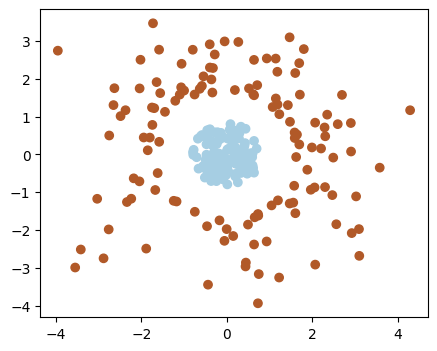

In [86]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y == 0] = X[y == 0] * 0.5

_, ax = plt.subplots (figsize=(5,4))
plt.scatter( X[:, 0] , X[:, 1] , c=y , cmap='Paired')

In [78]:
z = X[:, 0] **2 + X[:, 1] **2
print(z.shape)


(250,)


In [67]:
z = X[:, 0] *5 + X[:, 1] *10
print(z.shape)


(250,)


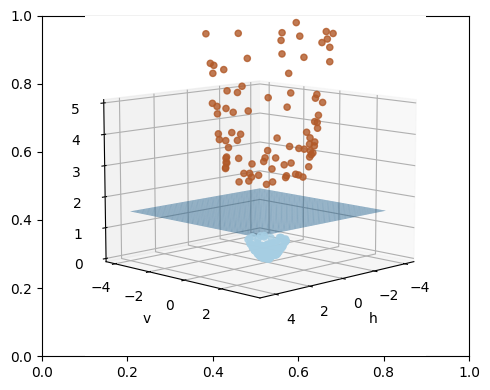

In [85]:
f, _ = plt.subplots(figsize=(5,4))
ax = f.add_subplot(projection='3d')

ax.view_init(10, 45)
ax.scatter3D( X[:, 0] , X[:, 1] , z , c = y , alpha=0.8, cmap='Paired')
plt.tight_layout()
ax.set_zlim(0,5)
ax.set_xlabel('h')
ax.set_ylabel('v')
h_grid, v_grid = np.meshgrid(np.linspace(-4,4,50), np.linspace(-4,3, 50))
z_grid = np.ones(h_grid.shape) * 1.5
ax.plot_surface(h_grid, v_grid, z_grid, alpha=0.5)

In [87]:
# Sve all figs
for angle in range(0,91, 5):
  f, _ = plt.subplots(figsize=(8,7))
  ax = f.add_subplot(projection='3d')
  ax.view_init(angle, 45)
  ax.scatter3D(X[:, 0], X[:, 1], z, alpha=0.8, cmap='Paired')
  #ax.plot_surface(h_grid, v_grid, z_grid, alpha=0.5)
  ax.set_zlim(0, 5)
  plt.tight_layout()
  plt.savefig("/content/drive/MyDrive/machine_learning/Sem_04/imgs/{0}.png".format(angle))
  plt.close(), plt.clf()

<ipython-input-87-169e9798a6b6>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X[:, 0], X[:, 1], z, alpha=0.8, cmap='Paired')


<Figure size 640x480 with 0 Axes>

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import os
from PIL import Image
from natsort import natsorted, ns

list_images = []
# Save a gif
#print (natsorted(os.listdir('/content/drive/MyDrive/machine_learning/Sem_04/imgs/'), alg=ns.PATH))
for img in natsorted(os.listdir('/content/drive/MyDrive/machine_learning/Sem_04/imgs/')):
  image = Image.open('/content/drive/MyDrive/machine_learning/Sem_04/imgs/' + img)
  list_images.append(image)

image.save("/content/drive/MyDrive/machine_learning/Sem_04/imgs/animation3.gif", save_all=True, append_images=list_images, duration=200, loop=0)

## SVM

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

(250, 2) (250,)


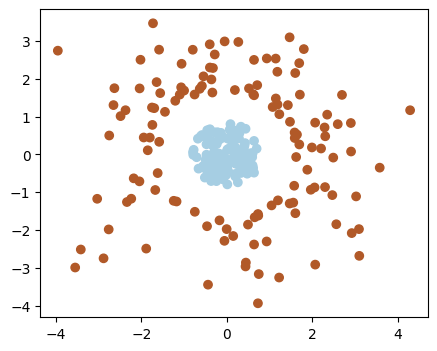

In [91]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 250 , n_features = 2 ,
                                 n_classes = 2 , random_state = 1)

print(X.shape, y.shape)
X[y == 0] = X[y == 0] * 0.5

_, ax = plt.subplots (figsize=(5,4))
plt.scatter( X[:, 0] , X[:, 1] , c=y , cmap='Paired')

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (15,5))

# fit the model
for kernel in kernels :
    #
    clf = SVC(kernel = kernel , gamma = 1)
    clf.fit( X , y )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.predict(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape( _ )
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.Paired)
    axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c = _ , cmap=plt.cm.Paired, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets